In [1]:
%matplotlib notebook
exec(defaults)

In [2]:
#rootdir = os.environ['postdoclcd']
rootdir = os.environ['postdoc']
os.listdir(rootdir)

['Prm8.00_om3.0',
 'Prm1.05_om3.0',
 'Prm3.00_om3.0',
 'H_om3.0',
 'Prm2.00_om3.0',
 '.ipynb_checkpoints',
 'from_Prm1.08_to_0.50',
 'Prm1.09_om3.0',
 'Prm4.00_om3.0_hydro_restart',
 'plots',
 'from_Prm1.08_to_1.00',
 'from_Prm1.08_to_0.75',
 'Prm1.00_om3.0',
 'from_Prm1.08_to_1.06',
 'template_from_Prm1.08_to_0.50',
 'Bifurcation_Diagram.ipynb',
 'Prm6.00_om3.0',
 'Prm1.11_om3.0',
 'Prm1.09_om3.0-nt768',
 'Prm1.08_om3.0',
 'NOND_numbers_vs_Pr_m.ipynb',
 'from_Prm1.08_to_1.05',
 'Prm4.00_om3.0',
 'Prm1.06_om3.0',
 'Prm4.00_om3.0_firstpart']

In [3]:
dirnames = ['Prm1.00_om3.0', 'Prm2.00_om3.0', 'Prm4.00_om3.0','Prm8.00_om3.0']
dirnames_full = []
for dirname in dirnames:
    dirnames_full.append(rootdir + '/' + dirname)

In [4]:
# read in AZ_Avgs data, grid info, and eq coeff from each directory
di_gi = []
di_eq = []
di_az = []

for dirname in dirnames_full:
    the_file = get_widest_range_file(dirname + '/data/', 'AZ_Avgs')
    print ('reading', the_file)
    di_az.append(get_dict(the_file))

    di_eq.append(get_eq(dirname))
    di_gi.append(get_grid_info(dirname))

reading /nobackup/lmatilsk/00_Summer_Postdoc/Prm1.00_om3.0/data/AZ_Avgs-03780000_25705000.pkl
reading /nobackup/lmatilsk/00_Summer_Postdoc/Prm2.00_om3.0/data/AZ_Avgs-02457500_23237500.pkl
reading /nobackup/lmatilsk/00_Summer_Postdoc/Prm4.00_om3.0/data/AZ_Avgs-07802500_50220000.pkl
reading /nobackup/lmatilsk/00_Summer_Postdoc/Prm8.00_om3.0/data/AZ_Avgs-01767500_21612500.pkl


In [5]:
# figure dimensions from scratch
ncol = len(dirnames)
width_inches = 7 + 1/16
margin_inches = 1/8 # margin width in inches (for both x and y) and 
    # horizontally in between figures
margin_left_inches = 3/8 # label Meridional circulation
margin_right_inches = 1/4
sub_margin_bottom_inches = 3/8
    # larger bottom margin to make room for colorbar
sub_margin_top_inches = 1/4 # wider top title
margin_top_inches = 1/4 # for overall title

sub_width_inches = (width_inches - (ncol-1)*margin_inches - margin_right_inches - margin_left_inches)/ncol 
sub_height_inches = 2*sub_width_inches

height_inches = 2*(sub_height_inches + sub_margin_bottom_inches + sub_margin_top_inches) + sub_margin_top_inches

# things in "figure units"
margin_x = margin_inches/width_inches
margin_y = margin_inches/height_inches
margin_right = margin_right_inches/width_inches
margin_left = margin_left_inches/width_inches

margin_top = margin_top_inches/height_inches
sub_margin_top = sub_margin_top_inches/height_inches
sub_margin_bottom = sub_margin_bottom_inches/height_inches
sub_width = sub_width_inches/width_inches
sub_height = sub_height_inches/height_inches  

print ("fig size: ", width_inches, height_inches)
print ("az size: ", sub_width_inches, sub_height_inches)

fig size:  7.0625 7.5625
az size:  1.515625 3.03125


In [6]:
# common parameters
fontsize = 8
fontsize_big = 9
linecolors = ['m', 'g', 'k']
linestyles = ['-.', ':', '--']
contourstyles = 3*['-'] + ['--'] + 3*['-']
tmax = 5000
cbar_aspect = 1/9
cbar_prec = 2
di_rcrit = get_dict('rcrit.pkl')
di_units = dotdict(get_dict('units.pkl'))

<IPython.core.display.Javascript object>


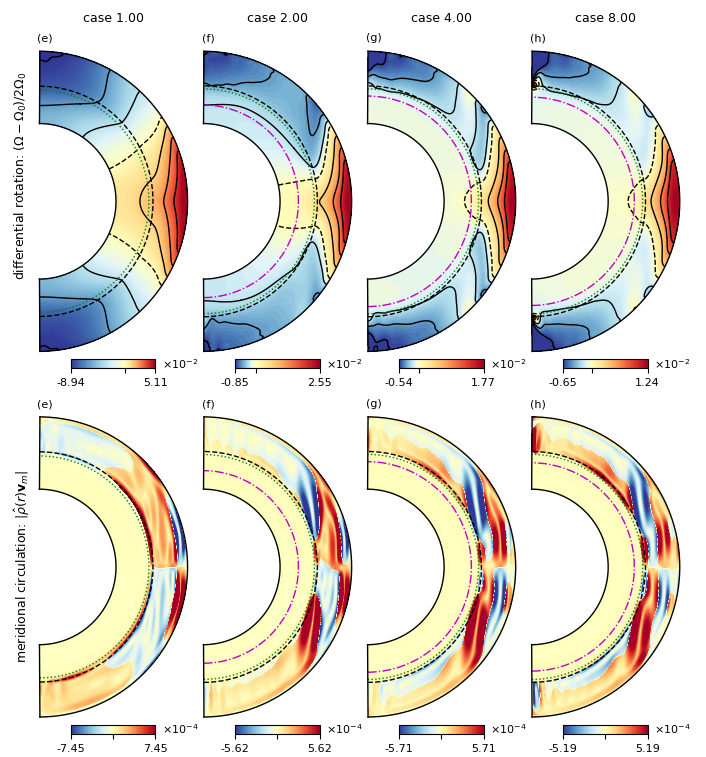

In [11]:
# Generate the actual figure of the correct dimensions
plt.close()
fig = plt.figure(figsize=(width_inches, height_inches))
axs = []

# make subplots

icol = 0
count = 0
for icol in range(ncol):
    # diffrot
    ax_left = margin_left + icol*(margin_x + sub_width)
    ax_bottom = 1 - margin_top - sub_margin_top - sub_height
    ax = fig.add_axes((ax_left, ax_bottom, sub_width, sub_height))
    
    di = di_az[icol]
    eq = di_eq[icol]
    gi = di_gi[icol]
    vals = di['vals']
    lut = di['lut']
    rotrate = (vals[:, :, lut[3]]/gi.xx) * di_units.t
    
    dirname = dirnames_full[icol]
    numbers_input = get_numbers_input(dirname)
    key = '%1.2f' %numbers_input.prm
    rcrit = di_rcrit[key]
    rvals = rcrit[:3]
    if icol == 0:
        icut = 1 # don't plot tachoclin depth when there's no tachocline
    else:
        icut = 0
    plot_azav (rotrate, gi.rr, gi.cost, fig, ax, plotaxis=False, nosci=False,\
               cbar_prec=cbar_prec, cbar_thick=3/32, cbar_aspect=cbar_aspect, cbar_fs=fontsize, plotlatlines=False,\
              rvals=rvals[icut:], linecolors1=linecolors[icut:], linestyles1=linestyles[icut:],\
              fullrange2=True, contourstyles=contourstyles, no0=True)
    ax.set_title('(' + letters[count + ncol] + ')', fontsize=fontsize, loc='left')

    # mercirc
    ax_left = margin_left + icol*(margin_x + sub_width)
    ax_bottom = sub_margin_bottom
    ax = fig.add_axes((ax_left, ax_bottom, sub_width, sub_height))
    vr_av, vt_av = vals[:, :, lut[1]], vals[:, :, lut[2]]
    rhovm = eq.rho*np.sqrt(vr_av**2 + vt_av**2) / (di_units.rho*di_units.v)
    psi = streamfunction(eq.rho*vr_av, eq.rho*vt_av, gi.rr, gi.cost)
    rhovm *= np.sign(psi)
    plot_azav (rhovm, gi.rr, gi.cost, fig, ax, plotaxis=False,\
               cbar_prec=cbar_prec, cbar_thick=3/32, cbar_aspect=cbar_aspect,\
               cbar_fs=fontsize, plotlatlines=False,\
              plotcontours=False, rvals=rvals[icut:],\
               linecolors1=linecolors[icut:], linestyles1=linestyles[icut:], no0=True)
    ax.set_title('(' + letters[count + ncol] + ')', fontsize=fontsize, loc='left')

    # title the column
    fig.text(margin_left + 0.5*sub_width + icol*(sub_width + margin_x), 1 - margin_y,\
            'case ' + key, fontsize=fontsize_big, ha='center', va='top')
    
    count += 1
# label sections
fig.text(margin_x, sub_margin_bottom + 0.5*sub_height,\
         'meridional circulation: ' + r'$|\hat{\rho}(r)\mathbf{v}_m|$',\
         rotation=90, ha='left', va='center', fontsize=fontsize_big)
fig.text(margin_x, 1 - sub_margin_top - 0.5*sub_height,\
         'differential rotation: ' + r'$(\Omega-\Omega_0)/2\Omega_0$',\
         rotation=90, ha='left', va='center', fontsize=fontsize_big)

plt.savefig('images/dr_and_mc.png', dpi=300)